In [172]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

In [173]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
X, y = make_blobs(n_samples=2000, centers=2)
# print(X)
# print(y)

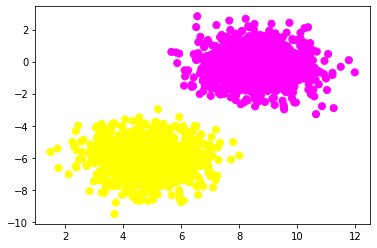

In [174]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.show()
# from matplotlib import pyplot
# from pandas import DataFrame
# df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
# colors = {0:'red', 1:'blue', 2:'green'}
# fig, ax = pyplot.subplots()
# grouped = df.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# pyplot.show()

In [175]:
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=98,test_size=0.2)
clf = svm.SVC(C=0.2,kernel='linear')
clf.fit(X_train,y_train)

SVC(C=0.2, kernel='linear')

In [176]:
clf.decision_function(X_train)
clf.decision_function(X_test)

array([-4.39359743,  3.79115315,  2.70688342,  4.96415411,  2.22886553,
        3.26611986, -3.41451673, -3.03144902,  2.15495972,  5.41253462,
       -2.76001177,  3.41309549, -2.70410738,  3.73722177,  4.62912053,
        3.36193452, -2.69385529, -2.90738753, -3.78874938, -2.21358526,
        1.41017121,  2.85494958, -2.71673565, -3.92862214, -4.31605072,
       -2.55525208, -2.79228349, -2.26507597,  3.40752368,  3.46623203,
       -2.42583377,  4.37327589, -3.73076626, -1.68719477,  5.22359534,
       -4.10007913,  2.91980328,  3.29464028, -3.60182713,  2.02811432,
        3.42413437, -1.07726115, -3.24838236, -4.2935322 , -3.74455296,
        3.37073259, -4.32694603, -4.87645931, -2.077066  ,  5.59200125,
       -3.22714321,  2.82280916,  3.9251001 , -2.81650526,  3.35632213,
       -2.39327595, -3.11299606, -3.88684844,  3.65110988,  1.35816627,
        3.60251853,  3.8143102 , -2.48458433, -3.68710554, -2.93959206,
        3.99507256,  1.86726054, -2.5023666 , -3.57414626,  2.93

In [177]:
y_pred=clf.predict(X_test)

In [178]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [179]:
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100))

Accuracy: 100.0%


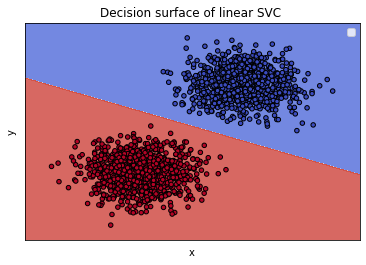

In [180]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)


ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

**PART B**

In [181]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [182]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [183]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [184]:
data=cancer.data
print(data.shape)
print(data)

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [185]:
target=cancer.target
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [186]:
X_train1 , X_test1 , y_train1, y_test1 = train_test_split(data, target, random_state=98,test_size=0.2)
clf1 = svm.SVC(C=0.4,kernel='linear')
clf1.fit(X_train1,y_train1)

SVC(C=0.4, kernel='linear')

In [187]:
y_pred1=clf1.predict(X_test1)
y_pred1

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1])

In [188]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))

Accuracy: 0.9649122807017544
Precision: 0.9594594594594594
Recall: 0.9861111111111112


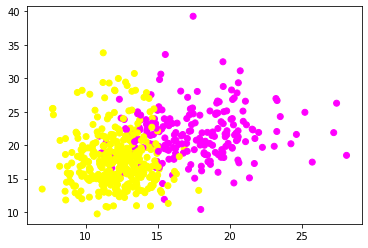

In [190]:
plt.scatter(data[:,0],data[:,1],c=target,cmap="spring")
plt.show()

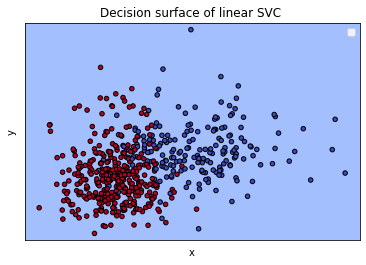

In [189]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = data[:, 0], data[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)


ax.scatter(X0, X1, c=target, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

**Exercise**

In [191]:
data=datasets.load_digits()


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [193]:
ex_X=data.data
ex_y=data.target
print(ex_X.shape)

(1797, 64)


In [194]:
print(ex_X)
print(ex_y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [196]:
X_train2 , X_test2 , y_train2, y_test2 = train_test_split(ex_X, ex_y, random_state=98,test_size=0.2)
ex_clf1 = svm.SVC(C=0.4,kernel='linear')
ex_clf1.fit(X_train2,y_train2)

SVC(C=0.4, kernel='linear')

In [197]:
ex_pred1=ex_clf1.predict(X_test2)
print(ex_pred1)

[1 6 3 7 0 2 1 4 1 7 1 2 4 7 1 3 7 5 4 7 6 9 9 4 9 5 9 2 3 6 7 9 4 9 0 2 8
 7 0 3 9 1 4 5 2 3 0 8 1 5 7 5 3 6 3 9 7 4 0 1 4 4 6 0 9 9 3 5 0 4 2 5 4 7
 5 6 8 6 2 5 4 6 4 9 5 2 1 6 9 7 5 8 3 4 2 7 3 4 7 2 9 8 0 0 5 7 0 5 0 6 7
 7 5 3 0 0 0 4 3 7 7 9 4 8 5 8 1 8 0 7 7 2 9 5 8 1 5 2 3 7 5 4 1 0 2 6 0 4
 8 8 2 3 9 3 0 7 2 5 2 9 8 8 6 4 7 1 3 4 6 6 5 3 0 7 2 4 6 4 7 2 3 3 7 4 9
 0 9 2 8 9 0 9 2 0 3 5 4 0 6 6 3 7 7 8 3 0 4 2 7 7 1 6 1 4 7 7 8 0 8 5 1 9
 2 4 1 6 1 2 2 4 2 9 0 7 3 4 7 0 3 7 8 0 8 9 3 3 0 6 8 6 2 3 3 6 5 5 6 1 5
 5 6 7 9 3 3 9 9 3 6 2 6 3 2 7 2 8 5 5 4 4 8 8 9 0 2 8 5 9 1 8 0 7 7 1 4 1
 7 6 2 0 4 1 8 6 5 0 2 9 3 3 2 7 7 2 2 2 0 4 5 9 4 3 4 8 2 4 3 3 7 8 1 6 5
 6 9 8 6 2 1 5 8 7 0 8 3 8 0 6 8 8 8 5 4 9 6 9 5 9 8 1]


In [201]:
from sklearn import metrics
print("Metrics measure for linear kernal:")
print("Accuracy for linear kernal:",metrics.accuracy_score(y_test2, ex_pred1))

Metrics measure for linear kernal:
Accuracy for linear kernal: 0.9833333333333333


In [202]:
ex_clf2 = svm.SVC(C=0.4,kernel='poly')
ex_clf2.fit(X_train2,y_train2)

SVC(C=0.4, kernel='poly')

In [206]:
ex_pred2=ex_clf2.predict(X_test2)
print(ex_pred2)

[1 6 3 7 0 2 1 4 1 7 1 2 4 7 1 3 7 5 4 7 6 9 9 4 9 5 9 2 3 6 7 9 4 5 0 2 8
 7 0 3 9 1 4 5 2 3 0 8 1 5 7 5 3 6 3 9 7 4 0 1 4 4 6 0 9 9 3 5 0 4 2 5 4 7
 5 6 8 6 2 5 4 6 4 9 5 2 1 6 9 7 5 8 3 4 2 7 3 4 7 2 9 8 0 0 5 7 0 5 0 6 7
 7 5 3 0 0 0 4 3 7 7 9 4 8 5 8 1 8 0 7 7 2 9 5 8 1 5 2 3 7 5 4 1 0 2 6 0 4
 8 8 2 3 9 3 0 7 2 5 2 9 8 8 6 4 7 1 3 4 6 6 5 3 0 7 2 4 6 4 7 2 3 3 7 4 9
 0 9 2 8 9 0 9 2 0 3 5 4 0 6 6 3 7 7 8 3 0 4 2 8 7 1 6 1 4 7 7 8 0 8 5 8 9
 2 4 1 6 1 2 2 4 2 9 0 7 3 4 7 0 3 7 8 0 1 9 3 3 0 6 9 6 2 3 3 6 5 5 6 1 5
 5 6 7 9 3 3 9 9 3 6 2 6 3 2 7 2 8 5 5 4 9 8 8 9 0 2 8 5 9 1 8 0 7 7 1 4 1
 7 6 2 0 4 1 8 6 5 0 2 9 9 3 2 7 7 2 2 2 0 4 5 9 4 3 4 8 2 4 3 3 7 8 1 6 5
 6 9 8 6 2 1 5 8 7 0 8 3 8 0 6 8 8 8 5 4 9 6 9 5 9 8 1]


In [205]:
from sklearn import metrics
print("Metrics measure for polynomial kernal:")
print("Accuracy for polynomial kernal:",metrics.accuracy_score(y_test2, ex_pred2))

Metrics measure for polynomial kernal:
Accuracy for polynomial kernal: 0.9972222222222222


In [207]:
ex_clf3 = svm.SVC(C=0.4,kernel='rbf')
ex_clf3.fit(X_train2,y_train2)

SVC(C=0.4)

In [208]:
ex_pred3=ex_clf3.predict(X_test2)
print(ex_pred3)

[1 6 3 7 0 2 1 4 1 7 1 2 4 7 1 3 7 5 4 7 6 9 9 4 9 5 9 2 3 6 7 9 4 5 0 2 8
 7 0 3 9 1 4 5 2 3 0 8 1 5 7 5 3 6 7 9 7 4 0 1 4 4 6 0 9 9 3 5 0 4 2 5 4 7
 5 6 8 6 2 5 4 6 4 9 5 2 1 6 9 7 5 8 3 4 2 7 3 4 7 2 9 8 0 0 5 7 0 5 0 6 7
 7 5 3 0 0 0 4 3 7 7 9 4 8 5 8 1 8 0 7 7 2 9 5 8 1 5 2 3 7 5 4 1 0 2 6 0 4
 8 8 2 3 9 3 0 7 2 5 2 9 8 8 6 4 7 1 3 4 6 6 5 3 0 7 2 4 6 4 7 2 3 3 7 4 9
 0 9 2 8 9 0 9 2 0 3 5 4 0 6 6 3 7 7 8 3 0 4 2 8 7 1 6 1 4 7 7 8 0 8 5 8 9
 2 4 1 6 1 2 2 4 2 9 0 7 3 4 7 0 3 7 1 0 1 9 3 3 0 6 8 6 2 3 3 6 5 5 6 1 5
 5 6 7 9 3 3 9 9 3 6 2 6 3 2 7 2 8 5 5 4 9 8 8 9 0 2 8 5 9 1 8 0 7 7 1 4 1
 7 6 2 0 4 1 8 6 5 0 2 9 9 3 2 7 7 2 2 2 0 4 5 9 4 3 4 8 2 4 3 3 7 8 1 6 5
 6 9 8 6 2 1 5 8 7 0 8 3 8 0 6 8 8 8 5 4 9 6 9 5 9 8 1]


In [209]:
from sklearn import metrics
print("Metrics measure for RBF kernal:")
print("Accuracy for RBF kernal:",metrics.accuracy_score(y_test2, ex_pred3))

Metrics measure for RBF kernal:
Accuracy for RBF kernal: 0.9944444444444445
